In [1]:
import numpy as np
import time
import networkx as nx
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image


### Puzzle as published 
https://www.janestreet.com/puzzles/andys-morning-stroll-index/

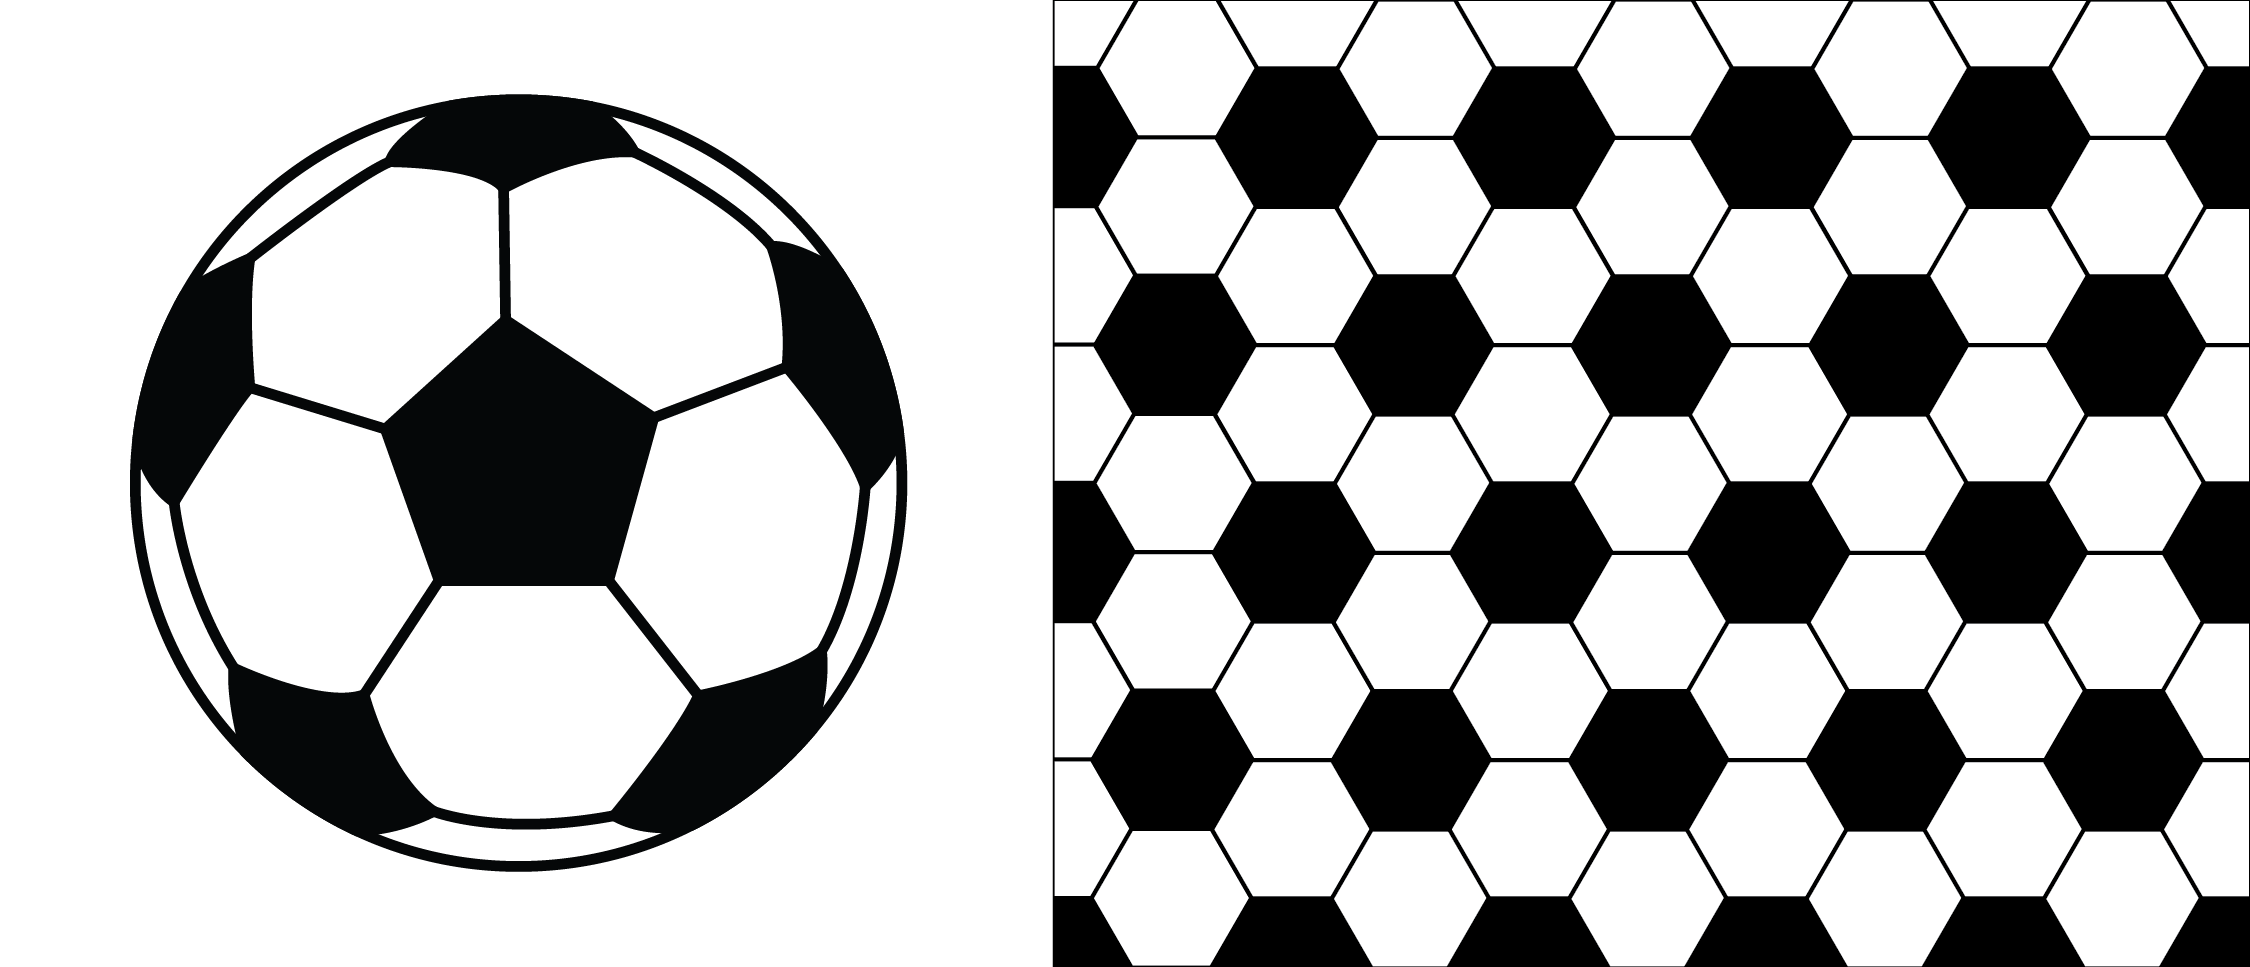

In [2]:
url='https://www.janestreet.com/puzzles/andys-morning-stroll-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Puzzle as published \n'+url))
display(Image('https://www.janestreet.com/puzzles/andys-morning-stroll.png',width=250))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))

In [3]:
# set up the graph for a soccerball. Paths back to 0 (starting space) stop there.
# use the property that the nth power of the adjacency matrix gives the number of 
# paths of length n between each node

soccer = {0:[],
          1:[0,4,5],
          2:[0,8,9],
          3:[0,6,7],
          4:[1,9,10],
          5:[1,6,11],
          6:[3,5,12],
          7:[3,8,13],
          8:[2,7,14],
          9:[2,4,15],
          10:[4,11,16],
          11:[5,10,17],
          12:[6,13,17],
          13:[7,12,18],
          14:[8,15,18],
          15:[9,14,16],
          16:[10,15,19],
          17:[11,12,19],
          18:[13,14,19],
          19:[16,17,18]}

g= nx.DiGraph()

for i in range(20):
    for j in soccer[i]:
        g.add_edge(i,j)
        
# count the paths from 1 back to 0 ... by symmetry multiply by 3 to get probability
a =nx.to_numpy_matrix(g,dtype=object)
x = a
tot1 = 0
for i in range(1,600):
    prob = x[0,1]*1/3**(i)
    tot1 += prob*(i+1)
    x = x@a
print("Ans:{:.3f}".format(tot1))


Ans:20.000


In [4]:
# Set up the floor
f = nx.hexagonal_lattice_graph(12,12)
b = nx.to_numpy_matrix(f,dtype=int)
origin = int(b.shape[0]/2)
b[origin,:]=0

# work out all the returning paths which are shorter and take that probability away from 1
y = b
tot2 = 0
i = 1

while i < tot1:
    prob = y[origin+1,origin]*1/3**(i)
    tot2 += prob
    i +=1
    y = y@b
    
print("Ans:{:.7f}".format(1-tot2))
 

Ans:0.4480326


In [5]:
url='https://www.janestreet.com/puzzles/andys-morning-stroll-solution'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
tags=soup.findAll('img')
for match in tags:
    match.decompose()

display(Markdown('### Solution as published \n'+url))
HTML(str(soup.find_all('div', {'class' :'col-12'})[3]))

### Solution as published 
https://www.janestreet.com/puzzles/andys-morning-stroll-solution